In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Funcion hash para mapear de una coordenada (x, y) de una malla de puntos equidistantes a un numero natural
def hashCoordenadaANumero(valorCoordenadaX, valorCoordenadaY, numeroVerticesAlto, numeroVerticesAncho):
    return valorCoordenadaX * numeroVerticesAncho + valorCoordenadaY

#Funcion hash para mapear de un numero natural a una coordenada (x, y) de una malla de puntos equidistantes
def hashNumeroACoordenada(numeroIdentificador, numeroVerticesAlto, numeroVerticesAncho):
    valorCoordenadaX = numeroIdentificador % numeroVerticesAncho
    valorCoordenadaY = int(numeroIdentificador / numeroVerticesAncho)
    return valorCoordenadaX, valorCoordenadaY

def crearAristaGrafoNoDirigido(grafo, nodoOrigen, nodoDestino, costo):
    if nodoOrigen not in grafo:
        grafo[nodoOrigen] = {}
    (grafo[nodoOrigen])[nodoDestino] = costo
    if nodoDestino not in grafo:
        grafo[nodoDestino] = {}
    (grafo[nodoDestino])[nodoOrigen] = costo

def crearGrafoMalla(numeroVerticesAlto, numeroVerticesAncho):
    grafo = {}
    
    #Construccion de aristas horizontales del grafo de malla
    for indice1 in range(numeroVerticesAlto):
        for indice2 in range(numeroVerticesAncho - 1):
            nodoOrigen = indice1 * numeroVerticesAncho + indice2
            nodoDestino = indice1 * numeroVerticesAncho + indice2 + 1
            costo = np.round(np.random.uniform(low = limiteInferiorCostosEntreAristasDelGrafo, high = limiteSuperiorCostosEntreAristasDelGrafo), 2)
            crearAristaGrafoNoDirigido(grafo, nodoOrigen, nodoDestino, costo)
    
    #Construccion de aristas verticales del grafo de malla
    for indice1 in range(numeroVerticesAlto - 1):
        for indice2 in range(numeroVerticesAncho):
            nodoOrigen = indice1 * numeroVerticesAncho + indice2
            nodoDestino = indice1 * numeroVerticesAncho + indice2 + numeroVerticesAncho
            costo = np.round(np.random.uniform(low = limiteInferiorCostosEntreAristasDelGrafo, high = limiteSuperiorCostosEntreAristasDelGrafo), 2)
            crearAristaGrafoNoDirigido(grafo, nodoOrigen, nodoDestino, costo)
    return grafo
    
def obtenerListasCoordendasGrafo(grafo, numeroVerticesAlto, numeroVerticesAncho):
    listaValoresCoordenadaX = []
    listaValoresCoordenadaY = []
    listaNodosVisitadosGrafo = []
    for nodoOrigen in grafo:
        for nodoDestino in grafo[nodoOrigen]:
            if nodoOrigen not in listaNodosVisitadosGrafo:
                listaNodosVisitadosGrafo.append(nodoOrigen)
                valorCoordenadaXNodoActual, valorCoordenadaYNodoActual = hashNumeroACoordenada(nodoOrigen, numeroVerticesAlto, numeroVerticesAncho)
                listaValoresCoordenadaX.append(valorCoordenadaXNodoActual)
                listaValoresCoordenadaY.append(valorCoordenadaYNodoActual)
            if nodoDestino not in listaNodosVisitadosGrafo:
                listaNodosVisitadosGrafo.append(nodoDestino)
                valorCoordenadaXNodoActual, valorCoordenadaYNodoActual = hashNumeroACoordenada(nodoDestino, numeroVerticesAlto, numeroVerticesAncho)
                listaValoresCoordenadaX.append(valorCoordenadaXNodoActual)
                listaValoresCoordenadaY.append(valorCoordenadaYNodoActual)
    return listaValoresCoordenadaX, listaValoresCoordenadaY

def registrarYDibujarAristasGrafoPlanoCartesiano(grafo, numeroVerticesAlto, numeroVerticesAncho, diccionarioCategoriasCostosAristas, limiteInferiorCostosEntreAristasDelGrafo, limiteSuperiorCostosEntreAristasDelGrafo):
    informacionGrafo = ""
    transparencia = 0.9
    numeroNivelesTrafico = len(list(diccionarioCategoriasCostosAristas.keys()))
    for nodoOrigen in grafo:
        for nodoDestino in grafo[nodoOrigen]:
            if nodoOrigen < nodoDestino:
                valorCoordenadaXNodoOrigen, valorCoordenadaYNodoOrigen = hashNumeroACoordenada(nodoOrigen, numeroVerticesAlto, numeroVerticesAncho)
                valorCoordenadaXNodoDestino, valorCoordenadaYNodoDestino = hashNumeroACoordenada(nodoDestino, numeroVerticesAlto, numeroVerticesAncho)
                for indice in range(1, numeroNivelesTrafico + 1):
                    if grafo[nodoOrigen][nodoDestino] <= indice * (limiteSuperiorCostosEntreAristasDelGrafo - limiteInferiorCostosEntreAristasDelGrafo) / numeroNivelesTrafico + limiteInferiorCostosEntreAristasDelGrafo:
                        colorArista = diccionarioCategoriasCostosAristas[list(diccionarioCategoriasCostosAristas.keys())[indice - 1]]
                        informacionGrafo += str(nodoOrigen) + " " + str(nodoDestino) + " " + str(grafo[nodoOrigen][nodoDestino]) + " " + colorArista + "\n"
                        plt.plot([valorCoordenadaXNodoOrigen, valorCoordenadaXNodoDestino], [valorCoordenadaYNodoOrigen, valorCoordenadaYNodoDestino], '', c = colorArista, alpha = transparencia)
                        break
    return informacionGrafo
                        
def construirGrafoNoDirigidoNetworkxCorrespondiente(grafo, numeroVerticesAlto, numeroVerticesAncho):
    grafoCorrespondiente = nx.Graph()
    posicionesNodosGrafo = {}
    posicionesNodosGrafoParaAristasHorizontales = {}
    posicionesNodosGrafoParaAristasHorizontales = {}
    aristasHorizontalesGrafo = {}
    aristasVerticalesGrafo = {}

    for nodoOrigen in grafo:
        for nodoDestino in grafo[nodoOrigen]:
            if nodoOrigen < nodoDestino:
                grafoCorrespondiente.add_edge(str(nodoOrigen), str(nodoDestino), weight = grafo[nodoOrigen][nodoDestino])
                if str(nodoOrigen) not in posicionesNodosGrafo:
                    valorCoordenadaXNodoOrigen, valorCoordenadaYNodoOrigen = hashNumeroACoordenada(nodoOrigen, numeroVerticesAlto, numeroVerticesAncho)
                    posicionesNodosGrafo[str(nodoOrigen)] = (valorCoordenadaXNodoOrigen, valorCoordenadaYNodoOrigen)
                if str(nodoDestino) not in posicionesNodosGrafo:
                    valorCoordenadaXNodoDestino, valorCoordenadaYNodoDestino = hashNumeroACoordenada(nodoDestino, numeroVerticesAlto, numeroVerticesAncho)
                    posicionesNodosGrafo[str(nodoDestino)] = (valorCoordenadaXNodoDestino, valorCoordenadaYNodoDestino)

                if nodoDestino - nodoOrigen == 1:
                    aristasHorizontalesGrafo[(str(nodoOrigen), str(nodoDestino))] = grafo[nodoOrigen][nodoDestino]
                    if str(nodoOrigen) not in posicionesNodosGrafoParaAristasHorizontales:
                        valorCoordenadaXNodoOrigen, valorCoordenadaYNodoOrigen = hashNumeroACoordenada(nodoOrigen, numeroVerticesAlto, numeroVerticesAncho)
                        posicionesNodosGrafoParaAristasHorizontales[str(nodoOrigen)] = (valorCoordenadaXNodoOrigen + 0.125, valorCoordenadaYNodoOrigen + 0.21)
                    if str(nodoDestino) not in posicionesNodosGrafoParaAristasHorizontales:
                        valorCoordenadaXNodoDestino, valorCoordenadaYNodoDestino = hashNumeroACoordenada(nodoDestino, numeroVerticesAlto, numeroVerticesAncho)
                        posicionesNodosGrafoParaAristasHorizontales[str(nodoDestino)] = (valorCoordenadaXNodoDestino + 0.125, valorCoordenadaYNodoDestino + 0.21)
                else:
                    aristasVerticalesGrafo[(str(nodoOrigen), str(nodoDestino))] = grafo[nodoOrigen][nodoDestino]
                    if str(nodoOrigen) not in posicionesNodosGrafoParaAristasHorizontales:
                        valorCoordenadaXNodoOrigen, valorCoordenadaYNodoOrigen = hashNumeroACoordenada(nodoOrigen, numeroVerticesAlto, numeroVerticesAncho)
                        posicionesNodosGrafoParaAristasHorizontales[str(nodoOrigen)] = (valorCoordenadaXNodoOrigen + 0.25, valorCoordenadaYNodoOrigen + 0.15)
                    if str(nodoDestino) not in posicionesNodosGrafoParaAristasHorizontales:
                        valorCoordenadaXNodoDestino, valorCoordenadaYNodoDestino = hashNumeroACoordenada(nodoDestino, numeroVerticesAlto, numeroVerticesAncho)
                        posicionesNodosGrafoParaAristasHorizontales[str(nodoDestino)] = (valorCoordenadaXNodoDestino + 0.25, valorCoordenadaYNodoDestino + 0.15)
    return grafoCorrespondiente, posicionesNodosGrafo, posicionesNodosGrafoParaAristasHorizontales, posicionesNodosGrafoParaAristasHorizontales, aristasHorizontalesGrafo, aristasVerticalesGrafo

def clasificarAristasGrafo(grafo, diccionarioCategoriasCostosAristas, limiteInferiorCostosEntreAristasDelGrafo, limiteSuperiorCostosEntreAristasDelGrafo):
    aristasGrafoClasificadasNiveles = {}
    numeroNivelesTrafico = len(list(diccionarioCategoriasCostosAristas.keys()))
    for indice in range(1, numeroNivelesTrafico + 1):
        if indice == 1:
            aristasGrafoClasificadasNiveles[list(diccionarioCategoriasCostosAristas.keys())[indice - 1]] = [(nodoOrigen, nodoDestino) for (nodoOrigen, nodoDestino, costo) in grafo.edges(data = True) if costo["weight"] <= indice * (limiteSuperiorCostosEntreAristasDelGrafo - limiteInferiorCostosEntreAristasDelGrafo) / numeroNivelesTrafico + limiteInferiorCostosEntreAristasDelGrafo]
        else:
            aristasGrafoClasificadasNiveles[list(diccionarioCategoriasCostosAristas.keys())[indice - 1]] = [(nodoOrigen, nodoDestino) for (nodoOrigen, nodoDestino, costo) in grafo.edges(data = True) if (indice - 1) * (limiteSuperiorCostosEntreAristasDelGrafo - limiteInferiorCostosEntreAristasDelGrafo) / numeroNivelesTrafico + limiteInferiorCostosEntreAristasDelGrafo < costo["weight"] and costo["weight"] <= indice * (limiteSuperiorCostosEntreAristasDelGrafo - limiteInferiorCostosEntreAristasDelGrafo) / numeroNivelesTrafico + limiteInferiorCostosEntreAristasDelGrafo]
    return aristasGrafoClasificadasNiveles

In [3]:
#Parametros de ejecucion del programa
nombreArchivo = "Graph Data.txt"
numeroVerticesAlto = 20
numeroVerticesAncho = 20
limiteInferiorCostosEntreAristasDelGrafo = 1.0
limiteSuperiorCostosEntreAristasDelGrafo = 2.0
diccionarioCategoriasTraficoAColores = {"Poco" : "#2ECC71", "Medio" : "#F1C40F", "Alto" : "#E74C3C"}

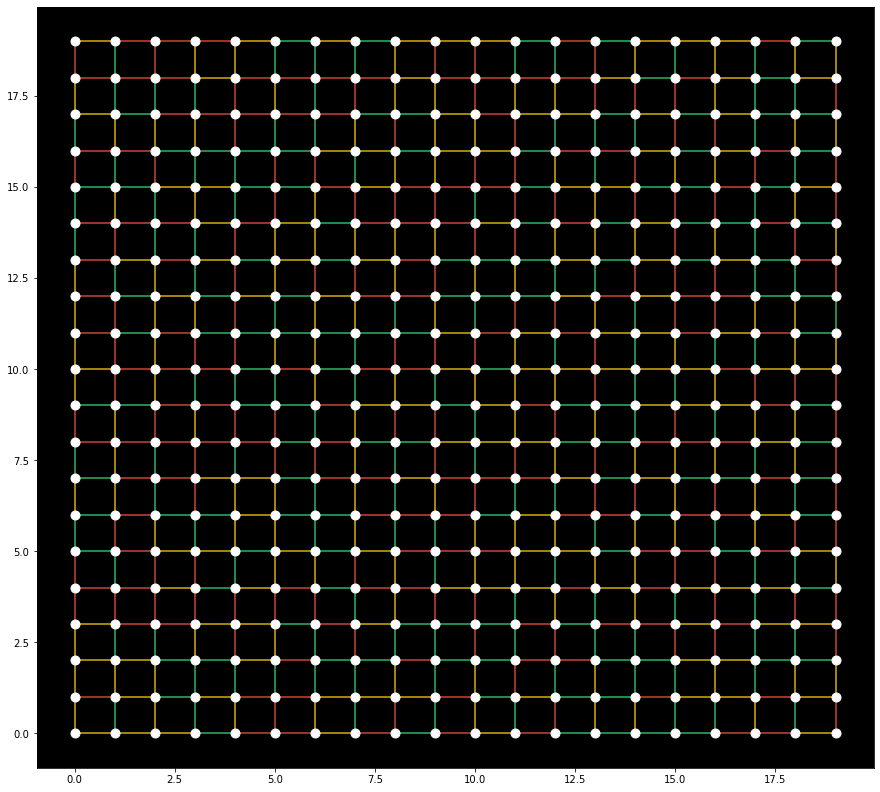

In [4]:
grafo = crearGrafoMalla(numeroVerticesAlto, numeroVerticesAncho)
listaValoresCoordenadasEjeX, listaValoresCoordenadasEjeY = obtenerListasCoordendasGrafo(grafo, numeroVerticesAlto, numeroVerticesAncho)

plt.rcParams['axes.facecolor'] = 'black'
plt.figure(figsize = (15, 14))
informacionGrafoMalla = registrarYDibujarAristasGrafoPlanoCartesiano(grafo, numeroVerticesAlto, numeroVerticesAncho, diccionarioCategoriasTraficoAColores, limiteInferiorCostosEntreAristasDelGrafo, limiteSuperiorCostosEntreAristasDelGrafo)
plt.plot(listaValoresCoordenadasEjeX, listaValoresCoordenadasEjeY, 'w.', markersize = 18)
plt.show()

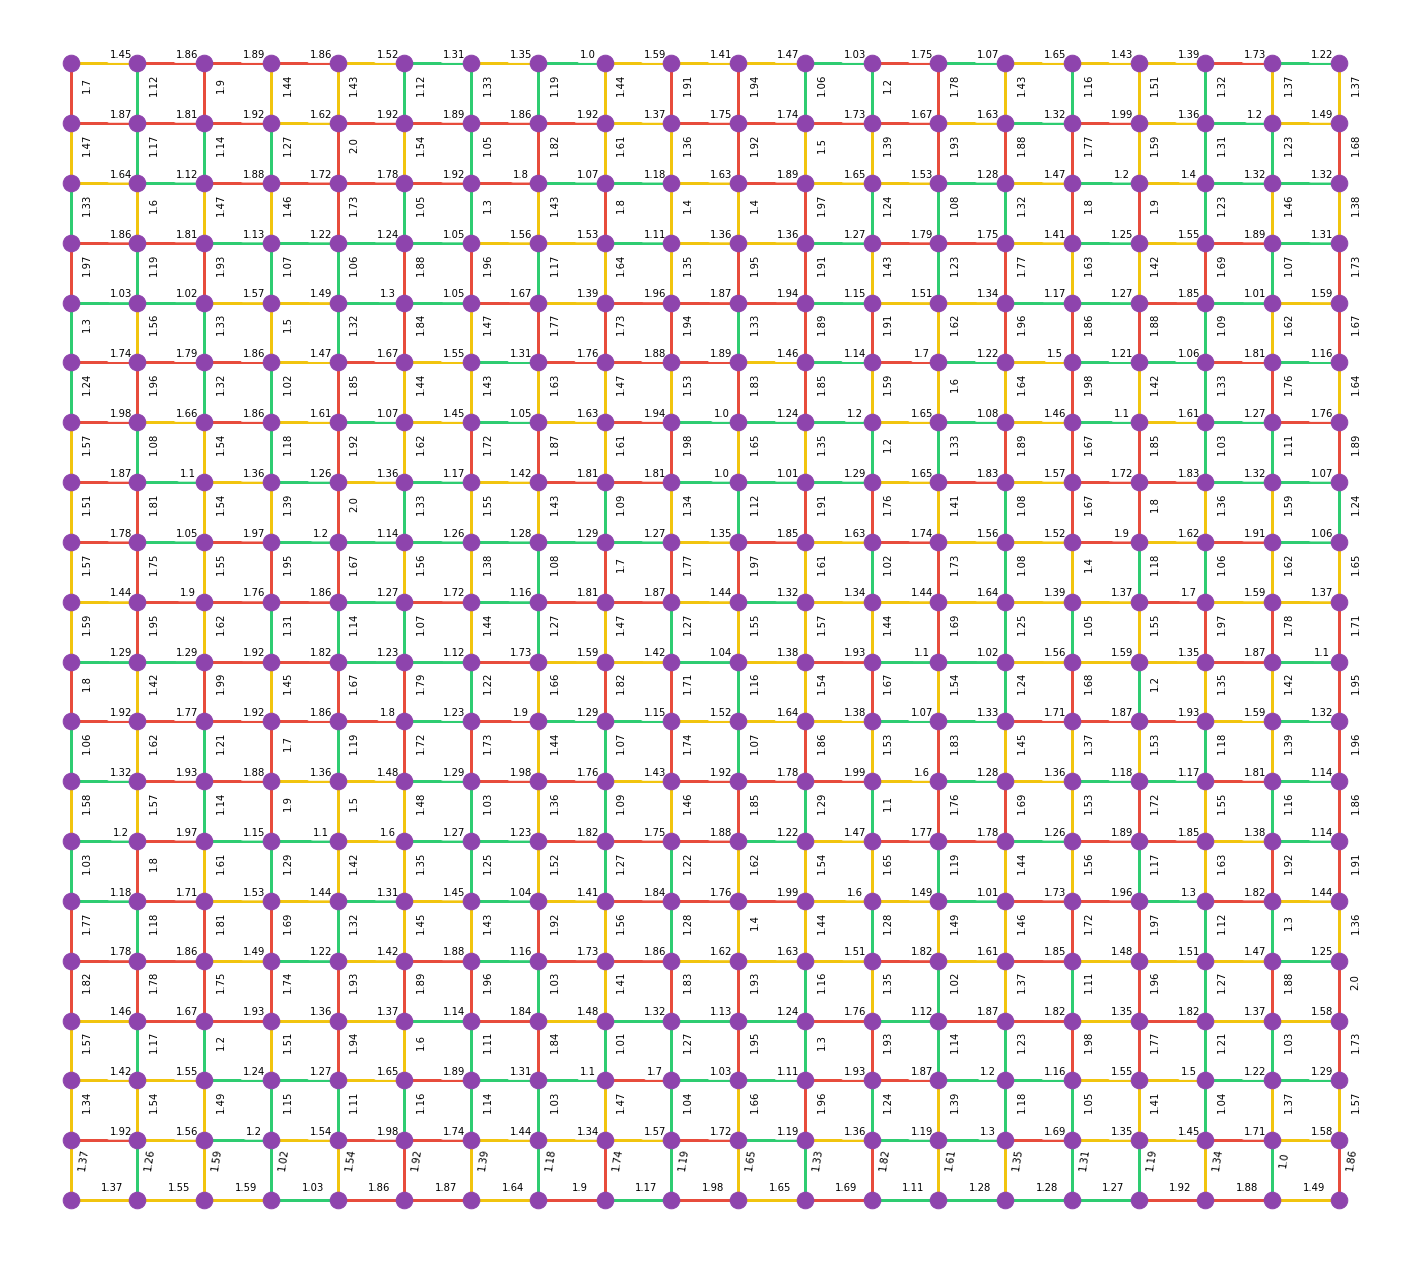

In [5]:
grafoNetworkXCorrespondiente, posicionesNodosGrafo, posicionesNodosGrafoParaAristasHorizontales, posicionesNodosGrafoParaAristasHorizontales, aristasHorizontalesGrafo, aristasVerticalesGrafo = construirGrafoNoDirigidoNetworkxCorrespondiente(grafo, numeroVerticesAlto, numeroVerticesAncho)
aristasGrafoClasificadasNiveles = clasificarAristasGrafo(grafoNetworkXCorrespondiente, diccionarioCategoriasTraficoAColores, limiteInferiorCostosEntreAristasDelGrafo, limiteSuperiorCostosEntreAristasDelGrafo)

plt.rcParams['axes.facecolor'] = 'white'
plt.figure(figsize = (25, 23))

listaNodosGrafo = posicionesNodosGrafo.keys()
layoutPosicionesNodosGrafo = nx.spring_layout(grafoNetworkXCorrespondiente, k = 1.0, pos = posicionesNodosGrafo, fixed = listaNodosGrafo)
layoutPosicionesNodosGrafoParaAristasHorizontales = nx.spring_layout(grafoNetworkXCorrespondiente, k = 1.0, pos = posicionesNodosGrafoParaAristasHorizontales, fixed = listaNodosGrafo)
layoutPosicionesNodosGrafoParaAristasVerticales = nx.spring_layout(grafoNetworkXCorrespondiente, k = 1.0, pos = posicionesNodosGrafoParaAristasHorizontales, fixed = listaNodosGrafo)

nx.draw_networkx_nodes(grafoNetworkXCorrespondiente, layoutPosicionesNodosGrafo, node_size = 275, node_color = '#8E44AD')
#nx.draw_networkx_labels(grafoNetworkXCorrespondiente, layoutPosicionesNodosGrafo, font_family = "sans-serif", font_size = 7, font_color = "w")

for indice in range(len(list(diccionarioCategoriasTraficoAColores.keys()))):
    colorArista = diccionarioCategoriasTraficoAColores[list(diccionarioCategoriasTraficoAColores.keys())[indice]]
    nx.draw_networkx_edges(grafoNetworkXCorrespondiente, layoutPosicionesNodosGrafo, edgelist = aristasGrafoClasificadasNiveles[list(diccionarioCategoriasTraficoAColores.keys())[indice]], width = 3, edge_color = colorArista)

#listaAristasGrafo = nx.get_edge_attributes(G, "weight")
#nx.draw_networkx_edge_labels(grafoNetworkXCorrespondiente, layoutPosicionesNodosGrafo, listaAristasGrafo)
nx.draw_networkx_edge_labels(grafoNetworkXCorrespondiente, layoutPosicionesNodosGrafoParaAristasHorizontales, aristasHorizontalesGrafo)
nx.draw_networkx_edge_labels(grafoNetworkXCorrespondiente, layoutPosicionesNodosGrafoParaAristasVerticales, aristasVerticalesGrafo)

plt.axis("off")
plt.show()

In [6]:
outputStream = open(nombreArchivo, "w")
outputStream.write(informacionGrafoMalla)
outputStream.close()